In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------
# 关键：使用Windows自带的中文字体（确保存在）
# ----------------------------
plt.rcParams["font.family"] = ["SimSun", "SimHei", "Microsoft YaHei"]  # 宋体、黑体、微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# ======================
# 1. 数据预处理
# ======================
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [7]:
# 取部分数据进行演示（防止计算量太大）
subset_size = 60000
train_subset = torch.utils.data.Subset(train_dataset, range(subset_size))
train_loader = DataLoader(train_subset, batch_size=subset_size, shuffle=False)

# ======================
# 2. 获取数据与标签
# ======================
images, labels = next(iter(train_loader))
X = images.view(subset_size, -1).numpy()  # (10000, 784)
y = labels.numpy()

# ======================
# 3. LDA降维
# ======================
lda_2d = LDA(n_components=2)
X_lda_2d = lda_2d.fit_transform(X, y)

lda_3d = LDA(n_components=3)
X_lda_3d = lda_3d.fit_transform(X, y)



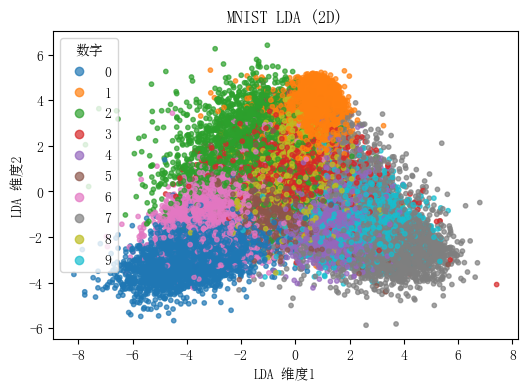

In [8]:
# ======================
# 4. 可视化
# ======================

# (1) LDA 2D 可视化
plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_lda_2d[:, 0], X_lda_2d[:, 1], c=y, cmap='tab10', alpha=0.7, s=10)
plt.legend(*scatter.legend_elements(), title="数字")
plt.title("MNIST LDA (2D)")
plt.xlabel("LDA 维度1")
plt.ylabel("LDA 维度2")
plt.show()

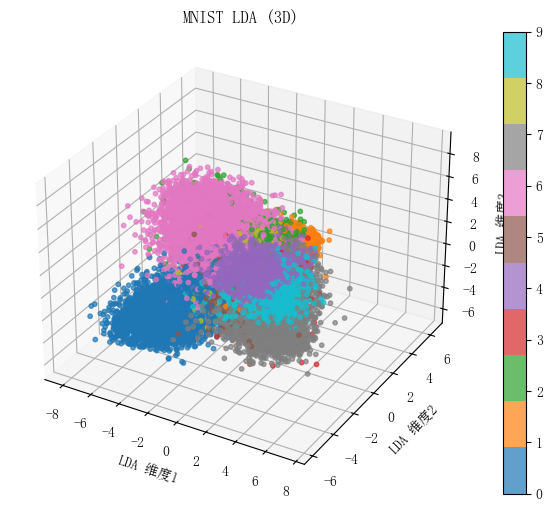

In [10]:
# (2) LDA 3D 可视化
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X_lda_3d[:, 0], X_lda_3d[:, 1], X_lda_3d[:, 2], c=y, cmap='tab10', alpha=0.7, s=10)
fig.colorbar(p)
ax.set_title("MNIST LDA (3D)")
ax.set_xlabel("LDA 维度1")
ax.set_ylabel("LDA 维度2")
ax.set_zlabel("LDA 维度3")
plt.show()

In [11]:
# (3) 解释方差占比（每个 LDA 维度的重要性）
explained_var_ratio = lda_2d.explained_variance_ratio_
print("各维度解释方差比：", explained_var_ratio)
print("累计解释方差比：", np.cumsum(explained_var_ratio))

各维度解释方差比： [0.23755412 0.20307863]
累计解释方差比： [0.23755412 0.44063276]
